# **Project: Heart Disease Prediction**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

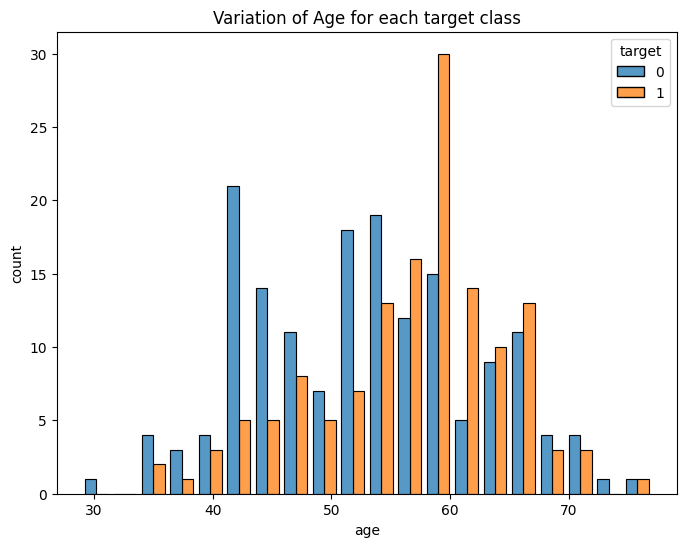

In [2]:
# Exercise 1

df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge', shrink=0.8, bins=20)
plt.title('Variation of Age for each target class')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

C:\Users\tienhyu\AppData\Local\Temp\ipykernel_31784\4042903672.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='age', hue='target', ci=None)


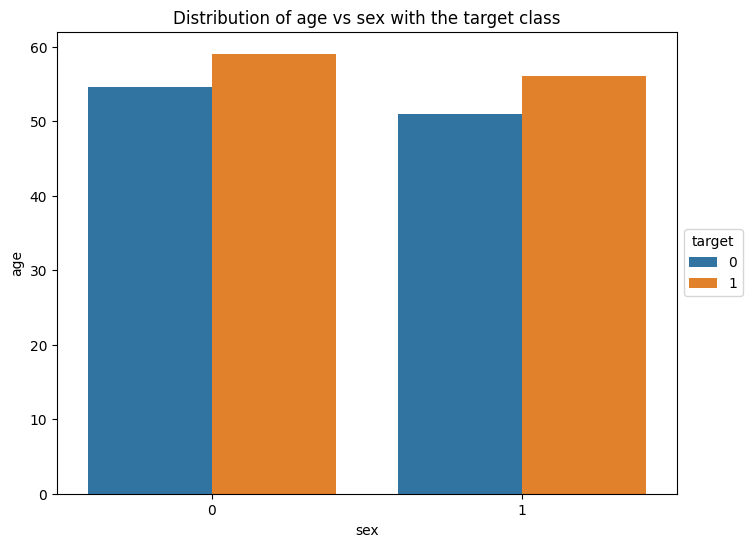

In [3]:
# Exercise 2

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='age', hue='target', ci=None)
plt.title('Distribution of age vs sex with the target class')
plt.xlabel('sex')
plt.ylabel('age')
plt.legend(title='target', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [4]:
# Exercise 3: KNeighborsClassifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Train the model
knn.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [5]:
# Exercise 4
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [6]:
# Exercise 5: Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)



print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))



Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [7]:
# Exercise 6: Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)

# Train the model
dtc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))



Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.72


In [8]:
# Exercise 7: Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [9]:
# Exercise 8: AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the AdaBoost classifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
abc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)



print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for AdaBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


c:\Users\tienhyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [10]:
# Exercise 9: GradientBoost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(
  learning_rate=0.1,
  n_estimators=100,
  subsample=1.0,
  min_samples_split=2,
  max_depth=3,
  random_state=42
)

# Train the model
gbc.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))



Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [11]:
# Exercise 10: XGboost

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)

# Train the model
xgb.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for XGboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGboost = {}'.format(accuracy_for_test))


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


In [12]:
# Exercise 11: Stacking

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Correctly define the classifiers
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)  # Corrected this line
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Create a list of base models
base_models = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

# Create the StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

# Create a pipeline with StandardScaler and StackingClassifier
pipeline = make_pipeline(StandardScaler(), stacking_classifier)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

c:\Users\tienhyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tienhyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tienhyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tienhyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the defa


Accuracy for training set for StackingClassifier = 0.93
Accuracy for test set for StackingClassifier = 0.9
